# Multiclass Classification using Keras and TensorFlow on Grocery Dataset
![alt text](https://www.thebalance.com/thmb/_-20qNsq-aO7mXFYXFu81KmLiCI=/1500x998/filters:fill(auto,1)/woman-grocery-shopping-57a2d95e3df78c32769e07ac.jpg)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Overview

* **Understand Grocery Dataset structure and files** 
* **Visualize random image from each of the food classes**
* **Split the image data into train and test using train.txt and test.txt**
* **Create a subset of data with few classes(3) - train_mini and test_mini for experimenting**
* **Fine tune Inception Pretrained model using dataset**
* **Visualize accuracy and loss plots**
* **Predicting classes for new images from internet**
* **Scale up and fine tune Inceptionv3 model with 10 classes of data**
* **Summary of the things I tried**


In [247]:
# Check if GPU is enabled
import tensorflow as tf
print(tf.__version__)
print(tf.test.gpu_device_name())

1.14.0
/device:GPU:0


In [0]:
# !unzip /content/Datasets.zip


### Understand Grocery Dataset structure and files 


* **This dataset has x images in total. It's a Grocery items Dataset with xx categories(multiclass)**
* **Each type of food has 2819 training samples and 500 test samples**

***On purpose, the training images were not cleaned, and thus still contain some amount of noise. This comes mostly in the form of intense colors and sometimes wrong labels. All images were rescaled to have a maximum side length of 512 pixels.***  


In [9]:
# Check the datasets folder
!ls /content/Datasets/images


Apple-Golden-Delicious	egg		    pea
Apple-Granny-Smith	Eggplant	    Peach
Apple-Pink-Lady		Flour		    Pear
Apple-Red-Delicious	Garlic		    Pineapple
Apple-Royal-Gala	Ginger		    pinto_beans
Asparagus		Ground-Beef	    Plum
Avocado			Hamburger	    Potato
Bacon			Honey		    Red-Bell-Pepper
Banana			hot-dog		    refried-beans
Beef			kidney-bean	    Regular-Tomato
Beef-Tomato		Kiwi		    Rice
Beet			Leek		    Solid-Potato
black_beans		Lemon		    sour_-ream
Bread			lentils		    Spinach
Broccoli		Lettuce		    Steak
Brown-Sugar		Lime		    Sweet-Potato
butter			Mango		    swiss-cheese
Cabbage			Melon		    tofu
Cantaloupe		milk		    Tomato
Carrots			mozzarella_cheese   tortilla-bread
cheddar_cheese		Mushroom	    Vine-Tomato
Chicken-Breast		Nectarine	    Watermelon
Chicken-Drumstick	noodles		    white_beans
chickpea		Onion		    Yellow-Bell-Pepper
Chocolate		Orange		    Yellow-Onion
coconut_milk		Orange-Bell-Pepper  yogurt
Corn			Papaya		    Zucchini
cottage_cheese		Parsly
Cucumber		pasta


**images** folder contains food folders with 1000 images  each  
Each folder contains images of a specific food class

In [11]:
import os
os.listdir("/content/Datasets/images")

['butter',
 'Solid-Potato',
 'Rice',
 'Cucumber',
 'pea',
 'Banana',
 'hot-dog',
 'Kiwi',
 'Corn',
 'cheddar_cheese',
 'Lemon',
 'Watermelon',
 'Carrots',
 'Garlic',
 'Asparagus',
 'Orange',
 'Zucchini',
 'Vine-Tomato',
 'Melon',
 'noodles',
 'Peach',
 'Orange-Bell-Pepper',
 'Beef',
 'Brown-Sugar',
 'Cantaloupe',
 'pinto_beans',
 'Broccoli',
 'Lettuce',
 'Apple-Red-Delicious',
 'Plum',
 'Mango',
 'chickpea',
 'Apple-Granny-Smith',
 'sour_-ream',
 'Parsly',
 'Bread',
 'refried-beans',
 'tofu',
 'Beet',
 'Bacon',
 'Chicken-Breast',
 'Ginger',
 'Mushroom',
 'Hamburger',
 'kidney-bean',
 'coconut_milk',
 'Steak',
 'Cabbage',
 'Papaya',
 'Chocolate',
 'swiss-cheese',
 'lentils',
 'pasta',
 'Sweet-Potato',
 'milk',
 'cottage_cheese',
 'tortilla-bread',
 'Onion',
 'Pineapple',
 'Avocado',
 'black_beans',
 'white_beans',
 'Eggplant',
 'Leek',
 'Yellow-Bell-Pepper',
 'Red-Bell-Pepper',
 'Flour',
 'Lime',
 'mozzarella_cheese',
 'Tomato',
 'Regular-Tomato',
 'Spinach',
 'Yellow-Onion',
 'yogurt',

**meta** folder contains the text files - train.txt and test.txt  
**train.txt** contains the list of images that belong to training set  
**test.txt** contains the list of images that belong to test set  
**classes.txt** contains the list of all classes of food

In [0]:
# os.listdir('/content/Datasets/train')


### Visualize random image from each classes

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
import numpy as np
from collections import defaultdict
import collections
import os

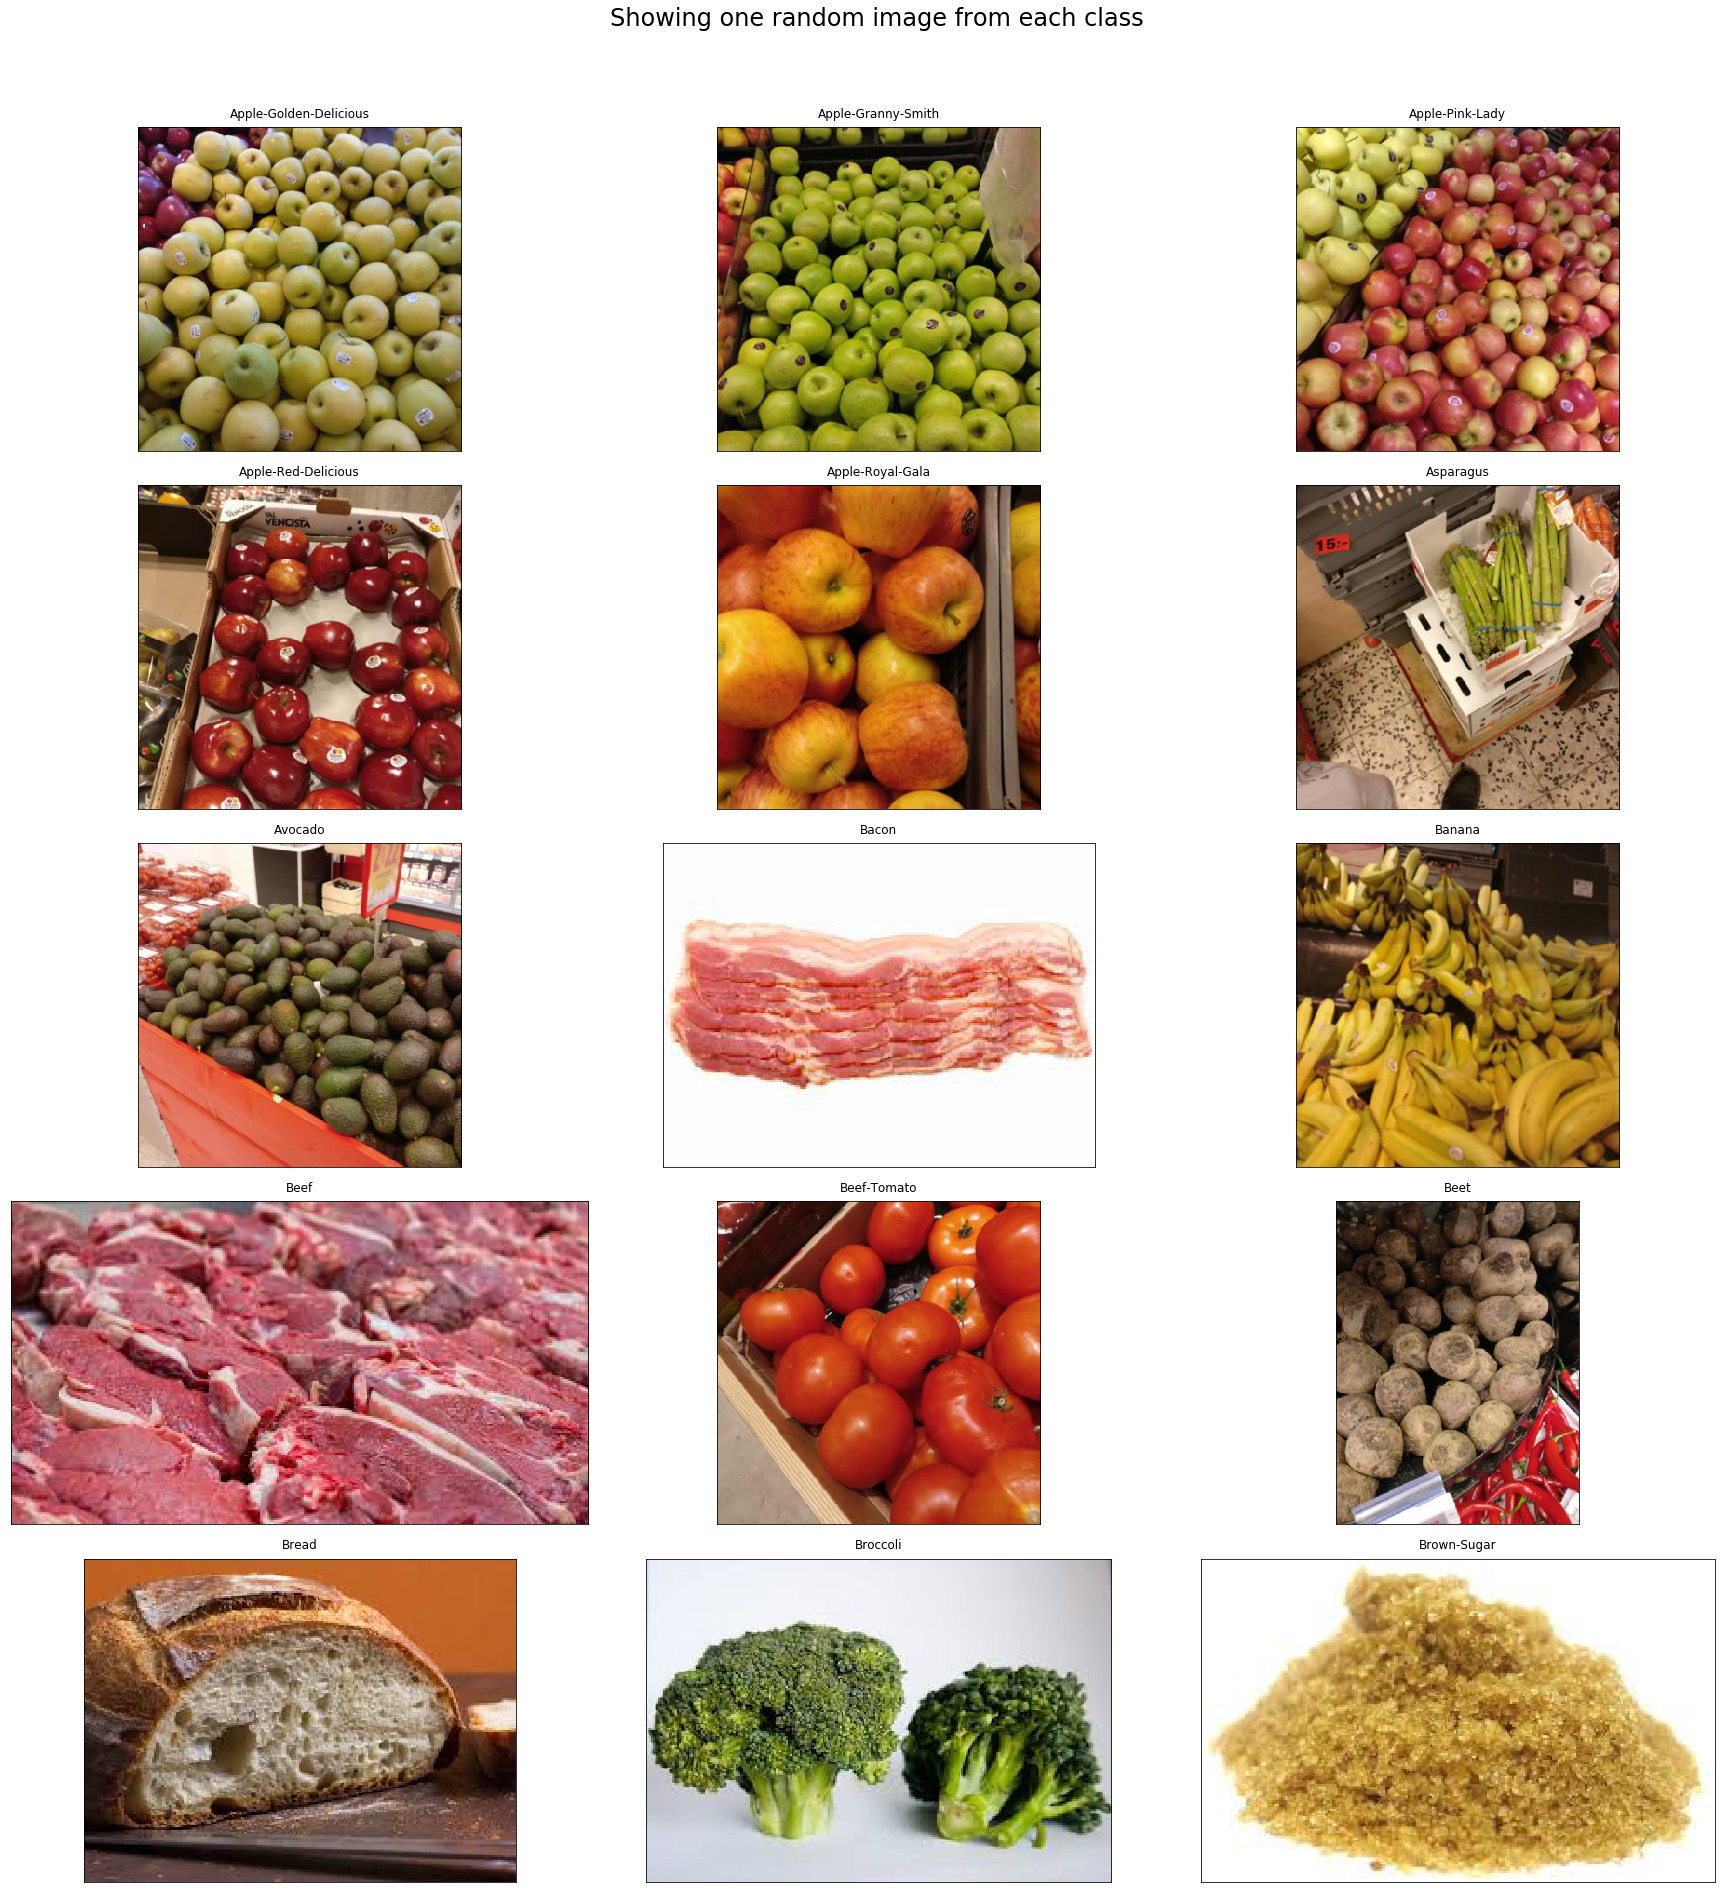

In [15]:
# Visualize the data, showing one image per class from Grocery Items
rows = 5
cols = 3
fig, ax = plt.subplots(rows, cols, figsize=(25,25))
fig.suptitle("Showing one random image from each class", y=1.05, fontsize=24) # Adding  y=1.05, fontsize=24 helped me fix the suptitle overlapping with axes issue
data_dir = "/content/Datasets/images"
foods_sorted = sorted(os.listdir(data_dir))
food_id = 0
for i in range(rows):
  for j in range(cols):
    try:
      food_selected = foods_sorted[food_id] 
      food_id += 1
    except:
      break
    food_selected_images = os.listdir(os.path.join(data_dir,food_selected)) # returns the list of all files present in each food category
    food_selected_random = np.random.choice(food_selected_images) # picks one food item from the list as choice, takes a list and returns one random item
    img = plt.imread(os.path.join(data_dir,food_selected, food_selected_random))
    ax[i][j].imshow(img)
    ax[i][j].set_title(food_selected, pad = 10)
    
plt.setp(ax, xticks=[],yticks=[])
plt.tight_layout()


### Split the image data into train and test using train.txt and test.txt

In [0]:
# Helper method to split dataset into train and test folders
from shutil import copy
def prepare_data(filepath, src,dest):
  classes_images = defaultdict(list)
  with open(filepath, 'r') as txt:
      paths = [read.strip() for read in txt.readlines()]
      for p in paths:
        food = p.split('/')
        classes_images[food[0]].append(food[1] + '.jpg')

  for food in classes_images.keys():
    print("\nCopying images into ",food)
    if not os.path.exists(os.path.join(dest,food)):
      os.makedirs(os.path.join(dest,food))
    for i in classes_images[food]:
      copy(os.path.join(src,food,i), os.path.join(dest,food,i))
  print("Copying Done!")

In [16]:
# Check how many files are in the train folder
print("Total number of samples in train folder")
!find /content/Datasets/train -type d -or -type f -printf '.' | wc -c

Total number of samples in train folder
2011


In [17]:
# Check how many files are in the test folder
print("Total number of samples in test folder")
!find /content/Datasets/test -type d -or -type f -printf '.' | wc -c

Total number of samples in test folder
2011


### Create a subset of data with few classes(3) - train_mini and test_mini for experimenting

* We now have train and test data ready  
* But to experiment and try different architectures, working on the whole data with all classes takes a lot of time and computation  
* To proceed with further experiments, I am creating train_min and test_mini, limiting the dataset to 3 classes  
* Since the original problem is multiclass classification which makes key aspects of architectural decisions different from that of binary classification, choosing 3 classes is a good start instead of 2

In [0]:
# List of all 101 types of foods(sorted alphabetically)
#foods_sorted

In [0]:
# Helper method to create train_mini and test_mini data samples
from shutil import copytree, rmtree
def dataset_mini(food_list, src, dest):
  if os.path.exists(dest):
    rmtree(dest) # removing dataset_mini(if it already exists) folders so that we will have only the classes that we want
  os.makedirs(dest)
  for food_item in food_list :
    print("Copying images into",food_item)
    copytree(os.path.join(src,food_item), os.path.join(dest,food_item))
      

In [0]:
# picking 3 food items and generating separate data folders for the same
food_list = ['Chicken-Breast','pasta','Onion']
src_train = 'Datasets/train'
dest_train = 'Datasets/train_mini'
src_test = 'Datasets/test'
dest_test = 'Datasets/test_mini'

In [22]:
print("Creating train data folder with new classes")
dataset_mini(food_list, src_train, dest_train)

Creating train data folder with new classes
Copying images into Chicken-Breast
Copying images into pasta
Copying images into Onion


In [23]:
print("Total number of samples in train folder")

!find Datasets/train_mini -type d -or -type f -printf '.' | wc -c

Total number of samples in train folder
43


In [24]:
print("Creating test data folder with new classes")
dataset_mini(food_list, src_test, dest_test)

Creating test data folder with new classes
Copying images into Chicken-Breast
Copying images into pasta
Copying images into Onion


In [25]:
print("Total number of samples in test folder")
!find Datasets/test_mini -type d -or -type f -printf '.' | wc -c

Total number of samples in test folder
43


### Fine tune Inception Pretrained model using our grocery dataset

* Keras and other Deep Learning libraries provide pretrained models  
* These are deep neural networks with efficient architectures(like VGG,Inception,ResNet) that are already trained on datasets like ImageNet  
* Using these pretrained models, we can use the already learned weights and add few layers on top to finetune the model to our new data  
* This helps in faster convergance and saves time and computation when compared to models trained from scratch

* We currently have a subset of dataset with 3 classes - Chicken-Breast, pasta and Onion  
* Use the below code to finetune Inceptionv3 pretrained model

In [26]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow import keras
import numpy as np



K.clear_session()

n_classes = 3
img_width, img_height = 299, 299
train_data_dir = 'Datasets/train_mini'
validation_data_dir = 'Datasets/test_mini'
nb_train_samples = 43 
nb_validation_samples = 43 
batch_size = 16

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')


inception = InceptionV3(weights='imagenet', include_top=False)
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(3,kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=predictions)
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='best_model_3class.hdf5', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history.log')

history = model.fit_generator(train_generator,
                    steps_per_epoch = nb_train_samples // batch_size,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples // batch_size,
                    epochs=10,
                    verbose=1,
                    callbacks=[csv_logger, checkpointer])

model.save('model_trained_3class.hdf5')


Found 43 images belonging to 3 classes.
Found 43 images belonging to 3 classes.


W0807 05:10:28.922585 139845424547712 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


87916544/87910968 [==============================] - 5s 0us/step
Epoch 1/10
1/2 [==============>...............] - ETA: 18s - loss: 1.1557 - acc: 0.3750
Epoch 00001: val_loss improved from inf to 1.30671, saving model to best_model_3class.hdf5
2/2 [==============================] - 52s 26s/step - loss: 1.2289 - acc: 0.2812 - val_loss: 1.3067 - val_acc: 0.2812
Epoch 2/10
1/2 [==============>...............] - ETA: 2s - loss: 1.1240 - acc: 0.4545
Epoch 00002: val_loss improved from 1.30671 to 1.29017, saving model to best_model_3class.hdf5
2/2 [==============================] - 4s 2s/step - loss: 1.1941 - acc: 0.3704 - val_loss: 1.2902 - val_acc: 0.2812
Epoch 3/10
1/2 [==============>...............] - ETA: 0s - loss: 1.1810 - acc: 0.3125
Epoch 00003: val_loss improved from 1.29017 to 1.26968, saving model to best_model_3class.hdf5
2/2 [==============================] - 2s 801ms/step - loss: 1.1943 - acc: 0.2963 - val_loss: 1.2697 - val_acc: 0.2812
Epoch 4/10
1/2 [==============>........

### Visualize the accuracy and loss plots

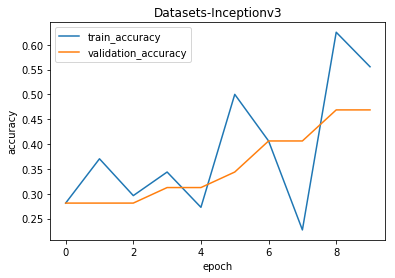

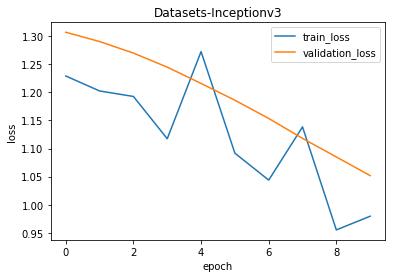

In [27]:
import matplotlib.pyplot as plt
def plot_accuracy(history,title):
    plt.title(title)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()
def plot_loss(history,title):
    plt.title(title)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()


plot_accuracy(history,'Datasets-Inceptionv3')
plot_loss(history,'Datasets-Inceptionv3')



* **The plots show that the accuracy of the model increased with epochs and the loss has decreased**
* **Validation accuracy has been on the higher side than training accuracy for many epochs**
* **This could be for several reasons:**
  * We used a pretrained model trained on ImageNet which contains data from a variety of classes
  * Using dropout can lead to a higher validation accuracy
* **The best model saved has a Top-1 validation accuracy of 93%**
 


### Predicting classes for new images from internet using the best trained model

In [28]:
# Loading the best saved model to make predictions
%%time
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model

K.clear_session()
model_best = load_model('best_model_3class.hdf5',compile = False)

W0807 05:13:02.703886 139845424547712 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0807 05:13:02.705836 139845424547712 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0807 05:13:02.709672 139845424547712 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling Ones.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecat

CPU times: user 9.18 s, sys: 201 ms, total: 9.38 s
Wall time: 9.36 s


* **Setting compile=False and clearing the session leads to faster loading of the saved model**
* **Withouth the above addiitons, model loading was taking more than a minute!**

In [0]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os

def predict_class(model, images, show = True):
  for img in images:
    img = image.load_img(img, target_size=(299, 299))
    img = image.img_to_array(img)                    
    img = np.expand_dims(img, axis=0)         
    img /= 255.                                      

    pred = model.predict(img)
    index = np.argmax(pred)
    food_list.sort()
    pred_value = food_list[index]
    if show:
        plt.imshow(img[0])                           
        plt.axis('off')
        plt.title(pred_value)
        plt.show()

In [30]:
# Downloading images from internet using the URLs
!wget -O Chicken-breast.jpg http://media.safebee.com/assets/images/2015/9/raw%20chicken%20breast.jpg.838x0_q67_crop-smart.jpg
!wget -O Pasta.jpg https://thumbs.dreamstime.com/z/background-fresh-uncooked-penne-pasta-1637917.jpg
!wget -O Onion.jpg https://kitsunetsukikitchen.files.wordpress.com/2013/04/onionsoup34.jpg

# If you have an image in your local computer and want to try it, uncomment the below code to upload the image files

# from google.colab import files
# image = files.upload()

--2019-08-07 05:13:25--  http://media.safebee.com/assets/images/2015/9/raw%20chicken%20breast.jpg.838x0_q67_crop-smart.jpg
Resolving media.safebee.com (media.safebee.com)... 13.32.252.70, 13.32.252.175, 13.32.252.240, ...
Connecting to media.safebee.com (media.safebee.com)|13.32.252.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33259 (32K) [image/jpeg]
Saving to: ‘Chicken-breast.jpg’

Chicken-breast.jpg  100%[===================>]  32.48K  --.-KB/s    in 0.1s    

2019-08-07 05:13:25 (337 KB/s) - ‘Chicken-breast.jpg’ saved [33259/33259]

--2019-08-07 05:13:27--  https://thumbs.dreamstime.com/z/background-fresh-uncooked-penne-pasta-1637917.jpg
Resolving thumbs.dreamstime.com (thumbs.dreamstime.com)... 192.229.144.114
Connecting to thumbs.dreamstime.com (thumbs.dreamstime.com)|192.229.144.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 439182 (429K) [image/jpeg]
Saving to: ‘Pasta.jpg’

Pasta.jpg           100%[==================

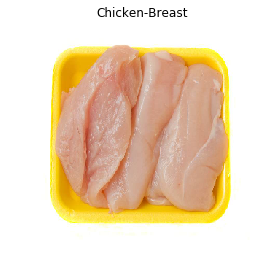

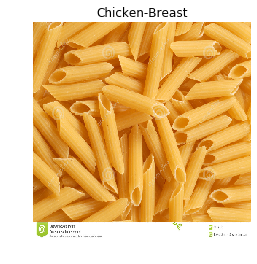

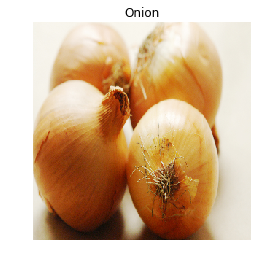

In [31]:
# Make a list of downloaded images and test the trained model
images = []
images.append('Chicken-breast.jpg')
images.append('Pasta.jpg')
images.append('Onion.jpg')
predict_class(model_best, images, True)

* **I was expecting, The model find them all right!! but it couldn't ** 

### Fine tune Inceptionv3 model with 10 classes of data

* **We trained a model on 3 classes and tested it using new data**
* ** The model was able to predict the classes of all three test images correctly**
* **Will it be able to perform at the same level of accuracy for more classes?**
* **our Grocery Dataset has 122 classes of data**
* **But to check how the model performs when more classes are included, I'm using the same model to fine test and train on 10 randomly chosen classes**


In [0]:
# Helper function to select n random food classes
import random
def pick_n_random_classes(n):
  food_list = []
  random_food_indices = random.sample(range(len(foods_sorted)),n) # We are picking n random food classes
  for i in random_food_indices:
    food_list.append(foods_sorted[i])
  food_list.sort()
  print("These are the randomly picked food classes we will be training the model on...\n", food_list)
  return food_list
  

In [33]:
# Lets try with more classes than just 3. Also, this time lets randomly pick the food classes
n = 10
food_list = pick_n_random_classes(10)

These are the randomly picked food classes we will be training the model on...
 ['Beet', 'Cantaloupe', 'Cucumber', 'Nectarine', 'Parsly', 'Peach', 'Plum', 'Regular-Tomato', 'Sweet-Potato', 'yogurt']


In [34]:
# Create the new data subset of n classes
print("Creating training data folder with new classes...")
dataset_mini(food_list, src_train, dest_train)

Creating training data folder with new classes...
Copying images into Beet
Copying images into Cantaloupe
Copying images into Cucumber
Copying images into Nectarine
Copying images into Parsly
Copying images into Peach
Copying images into Plum
Copying images into Regular-Tomato
Copying images into Sweet-Potato
Copying images into yogurt


In [35]:
print("Total number of samples in train folder")
!find Datasets/train_mini -type d -or -type f -printf '.' | wc -c

Total number of samples in train folder
280


In [36]:
print("Creating test data folder with new classes")
dataset_mini(food_list, src_test, dest_test)


Creating test data folder with new classes
Copying images into Beet
Copying images into Cantaloupe
Copying images into Cucumber
Copying images into Nectarine
Copying images into Parsly
Copying images into Peach
Copying images into Plum
Copying images into Regular-Tomato
Copying images into Sweet-Potato
Copying images into yogurt


In [37]:
print("Total number of samples in test folder")
!find Datasets/test_mini -type d -or -type f -printf '.' | wc -c

Total number of samples in test folder
280


In [46]:
# Let's use a pretrained Inceptionv3 model on subset of data with 10 food classes

import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow import keras
import numpy as np

K.clear_session()

n_classes = n
img_width, img_height = 299, 299
train_data_dir = 'Datasets/train_mini'
validation_data_dir = 'Datasets/test_mini'
nb_train_samples = 280
nb_validation_samples = 280
batch_size = 16

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')


inception = InceptionV3(weights='imagenet', include_top=False)
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(n,kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=predictions)
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='best_model_10class.hdf5', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history.log')

history_10class = model.fit_generator(train_generator,
                    steps_per_epoch = nb_train_samples // batch_size,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples // batch_size,
                    epochs=10,
                    verbose=1,
                    callbacks=[csv_logger, checkpointer])

model.save('model_trained_10class.hdf5')


Found 280 images belonging to 10 classes.
Found 280 images belonging to 10 classes.
Epoch 1/10
16/17 [===========================>..] - ETA: 1s - loss: 2.5176 - acc: 0.0685
Epoch 00001: val_loss improved from inf to 2.48199, saving model to best_model_10class.hdf5
17/17 [==============================] - 52s 3s/step - loss: 2.5098 - acc: 0.0720 - val_loss: 2.4820 - val_acc: 0.0956
Epoch 2/10
16/17 [===========================>..] - ETA: 0s - loss: 2.3323 - acc: 0.1815
Epoch 00002: val_loss improved from 2.48199 to 2.30949, saving model to best_model_10class.hdf5
17/17 [==============================] - 8s 489ms/step - loss: 2.3322 - acc: 0.1856 - val_loss: 2.3095 - val_acc: 0.1838
Epoch 3/10
16/17 [===========================>..] - ETA: 0s - loss: 2.1998 - acc: 0.2581
Epoch 00003: val_loss improved from 2.30949 to 2.14845, saving model to best_model_10class.hdf5
17/17 [==============================] - 8s 486ms/step - loss: 2.2057 - acc: 0.2538 - val_loss: 2.1484 - val_acc: 0.3640
Epoc

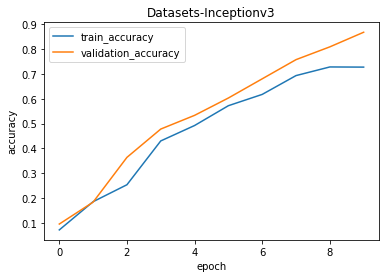

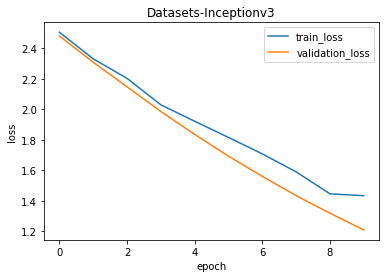

In [47]:
plot_accuracy(history_10class,'Datasets-Inceptionv3')
plot_loss(history_10class,'Datasets-Inceptionv3')

* **The plots show that the accuracy of the model increased with epochs and the loss has decreased**
* **Validation accuracy has been on the higher side than training accuracy for many epochs**
* **This could be for several reasons:**
  * We used a pretrained model trained on ImageNet which contains data from a variety of classes
  * Using dropout can lead to a higher validation accuracy
* **I set number of epochs to just 10, as each epoch's taking around 6mins**
* **loss is still decreasing, so the model can have some more epochs**
* **Increase the number of epochs for better accuracy**
 


In [48]:
# Loading the best saved model to make predictions
%%time
from tensorflow.keras.models import load_model
K.clear_session()
model_best = load_model('best_model_10class.hdf5',compile = False)

CPU times: user 9.3 s, sys: 136 ms, total: 9.44 s
Wall time: 9.42 s


In [51]:
# Downloading images from internet using the URLs
!wget -O image1.jpg http://pilatesnutritionist.com/wp-content/uploads/2014/01/beets-farmers-market.jpg
!wget -O image2.jpg https://buzzkenya.com/wp-content/uploads/2015/03/health-benefits-of-Rockmelons-e1425375488209.jpg
!wget -O image3.jpg https://s3-media3.fl.yelpcdn.com/bphoto/4rcEBks5oxLSIO0Af-utwg/348s.jpg
!wget -O image4.jpg http://1.bp.blogspot.com/_hCWAzyU7uLA/TDKwG2jdbSI/AAAAAAAAANs/ijxVWMOGsa0/s1600/IMG_2028a.JPG
!wget -O image5.jpg https://www.rd.com/wp-content/uploads/2017/11/09_Heart_Parsley-Is-More-than-a-Garnish_389614213_Stephen-Orsillo-760x506.jpg
!wget -O image6.jpg http://4.bp.blogspot.com/-GbaCxh2iREM/T_h84s7JRFI/AAAAAAAAGos/A7uLR7Zs6rA/s1600/DSC01705.JPG
!wget -O image7.jpg https://images.fineartamerica.com/images/artworkimages/mediumlarge/1/purple-plums-fruit-pattern-artpics.jpg
!wget -O image8.jpg https://www.israel21c.org/wp-content/uploads/2018/10/f90-tomatoes.jpg
!wget -O image9.jpg https://www.gimmesomeoven.com/wp-content/uploads/2011/03/The-Best-Crispy-Baked-Sweet-Potato-Fries-Recipe-3.jpg
!wget -O image10.jpg https://hotspotorlando.files.wordpress.com/2012/10/prn4-wells-enterprises-yoplait-frozen-yogurt-1y-1high.jpg

# If you have an image in your local computer and want to try it, uncomment the below code to upload the image files
# from google.colab import files
# image = files.upload()

--2019-08-07 05:40:05--  http://pilatesnutritionist.com/wp-content/uploads/2014/01/beets-farmers-market.jpg
Resolving pilatesnutritionist.com (pilatesnutritionist.com)... 96.126.113.51
Connecting to pilatesnutritionist.com (pilatesnutritionist.com)|96.126.113.51|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 97715 (95K) [image/jpeg]
Saving to: ‘image1.jpg’

image1.jpg          100%[===================>]  95.42K   368KB/s    in 0.3s    

2019-08-07 05:40:05 (368 KB/s) - ‘image1.jpg’ saved [97715/97715]

--2019-08-07 05:40:06--  https://buzzkenya.com/wp-content/uploads/2015/03/health-benefits-of-Rockmelons-e1425375488209.jpg
Resolving buzzkenya.com (buzzkenya.com)... 104.28.25.13, 104.28.24.13, 2606:4700:30::681c:180d, ...
Connecting to buzzkenya.com (buzzkenya.com)|104.28.25.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88876 (87K) [image/jpeg]
Saving to: ‘image2.jpg’

image2.jpg          100%[===================>]  86.79K  --.-KB

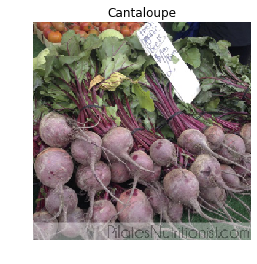

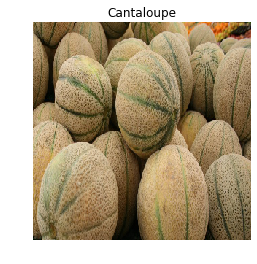

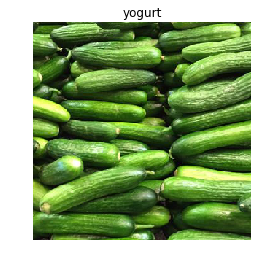

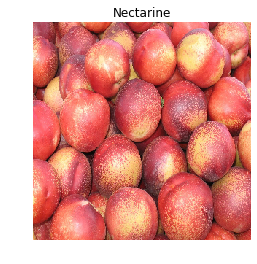

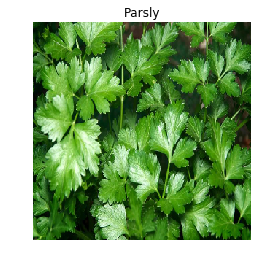

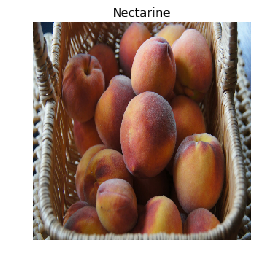

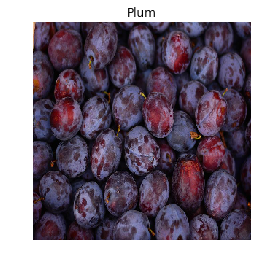

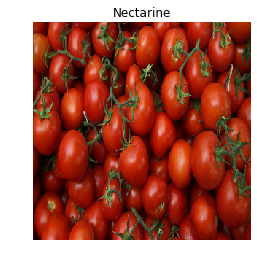

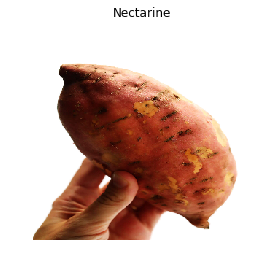

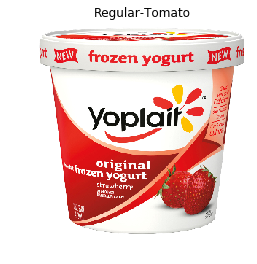

In [52]:
# Make a list of downloaded images and test the trained model
images = []
images.append('image1.jpg')
images.append('image2.jpg')
images.append('image3.jpg')
images.append('image4.jpg')
images.append('image5.jpg')
images.append('image6.jpg')
images.append('image7.jpg')
images.append('image8.jpg')
images.append('image9.jpg')
images.append('image10.jpg')

predict_class(model_best, images, True)

* **The model did well ** Not at All

### Summary of the things I tried
* **This notebook is the refactored and organised version of all the experiments and training trials I made**
* **I used this very useful Keras blog - https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html for reference**
* **I spent considerable amount of time in fixing things even before getting to the model training phase**
* **For example, it took some time to get the image visualization plots aligned withouth any overlap**
* **It is easier to go through a notebook and understand code someone else has taken hours to finish**
* **I started with VGG16 pretrained model. It did give good validation accuracy after training for few epochs**
* **I then tried Inceptionv3. VGG was taking more time for each epoch and since inception was also giving good validation accuracy, I chose Inception over VGG**
* **I ran both VGG and Inception with two different image sizes - 150 X  50 and 299 X 299**
* **I had better results with larger image size and hence chose 299 X 299**
* **For data augmentation, I sticked to the transformations used in the above blog**
* **To avoid Colab connection issues during training, I set number of epochs to 10**
* **As the loss is still decreasing after 10 epochs both with 3-class and 10-class subset of data, the model can be trained for some more epochs for better accuracy**
